In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import seaborn as sns

#  Load the data from bank-additional-full.csv


In [18]:
df = pd.read_csv('bank-additional-full.csv', sep= ';')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [20]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [21]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#  Data preprocessing:


Use LabelEncoder to convert the label into numbers.


In [23]:
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'], )
df['y']

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int32

Perform one-hot encoding on the categorical features using df_dummies = pd.get_dummies(df)


In [36]:
for column in df.columns:
    if df[column].dtype == 'O':
        print(df[column].value_counts())
        print('-*'*20)

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
-*-*-*-*-*-*-*-*

In [38]:
df_dummies = pd.get_dummies(df)
df_dummies

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0


In [41]:
print(df.shape)
print(df_dummies.shape)

(41188, 21)
(41188, 64)


Column "duration" must be deleted


In [52]:
df_dummies.drop('duration', axis= 1, inplace=True)

In [53]:
df_dummies.shape

(41188, 63)

Check if there are any missing values in the dataset. If there are, drop the rows.


In [56]:
df_dummies.isnull().sum()

age                     0
campaign                0
pdays                   0
previous                0
emp.var.rate            0
                       ..
day_of_week_tue         0
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
Length: 63, dtype: int64

Plot a histogram of the label (i.e., column 'y') and calculate the imbalance in the dataset (i.e., divide the number of instances of the minority class by the total length of the dataframe).

In [57]:
y_df = df_dummies['y'].copy()

In [61]:
type(y_df)

pandas.core.series.Series

In [62]:
y_df

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int32

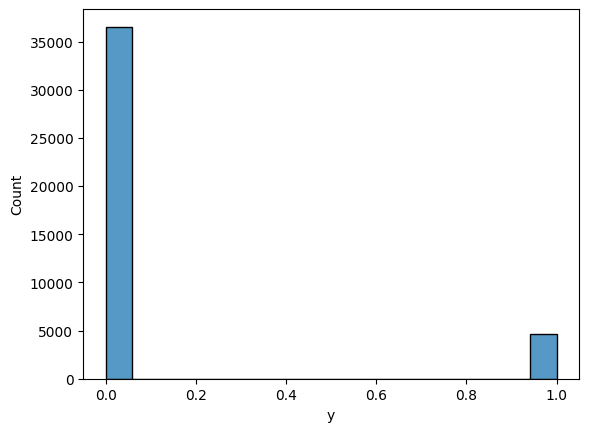

In [59]:
_ = sns.histplot(y_df, kde=False)

In [64]:
y_df.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [67]:
print(f'The imbalance ratio in the dataset is {4640/len(y_df)}')

The imbalance ratio in the dataset is 0.11265417111780131


# Let's model the data. It's very important that you follow these steps in this order or CodeRunner won't mark your solution as correct:

In [84]:
train_set, test_set = train_test_split(df_dummies, test_size=0.2, random_state=50, stratify=df_dummies['y'])  

In [85]:
train_set.shape

(32950, 63)

In [86]:
test_set.shape

(8238, 63)

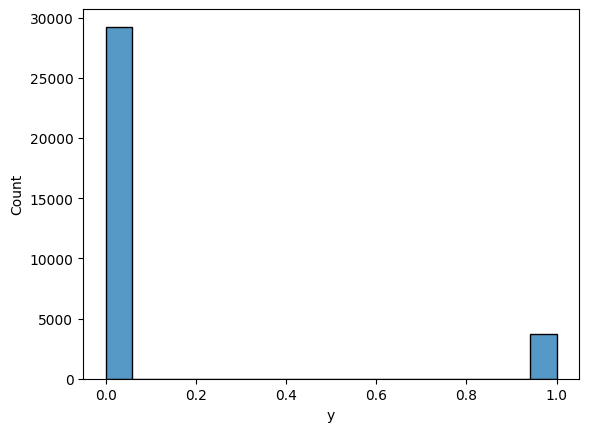

In [87]:
_ = sns.histplot(train_set['y'], kde=False)

In [100]:

y_dic_train = dict(train_set['y'].value_counts())
y_dic_train

{0: 29238, 1: 3712}

In [103]:
imbalance_ratio_train = y_dic_train[1]/(y_dic_train[0] + y_dic_train[1])
imbalance_ratio_train

0.11265553869499241

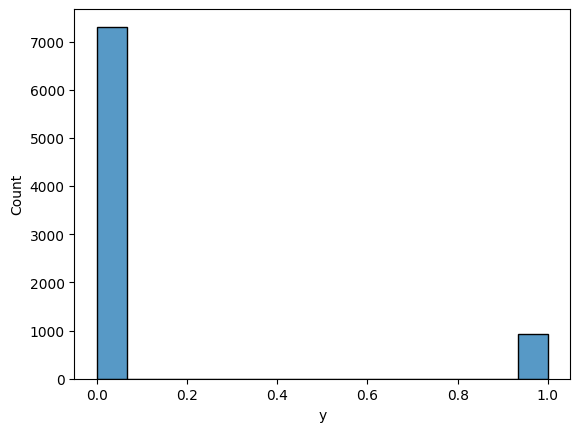

In [88]:
_ = sns.histplot(test_set['y'], kde=False)

In [102]:
y_dic_test = dict(test_set['y'].value_counts())
y_dic_test

{0: 7310, 1: 928}

In [104]:
imbalance_ratio_test = y_dic_test[1]/(y_dic_test[0] + y_dic_test[1])
imbalance_ratio_test

0.11264870114105366